In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
data = pd.read_csv('sonar.all-data.csv')

In [5]:
data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
data = pd.read_csv('sonar.all-data.csv', header = None)

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
data.shape

(208, 61)

# Changing column name 60 as "labels"

In [9]:
data = data.rename(columns = {60:'labels'})

In [10]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,labels
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Checking for any missing values

In [11]:
df = data.isnull().any()

In [12]:
df

0         False
1         False
2         False
3         False
4         False
          ...  
56        False
57        False
58        False
59        False
labels    False
Length: 61, dtype: bool

In [13]:
df.unique()

array([False])

# Checking the balancing of dataset

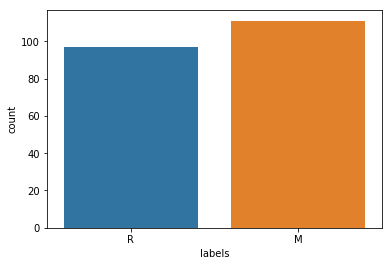

In [14]:
sns.countplot(x = 'labels', data = data)

In [15]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Visulaization

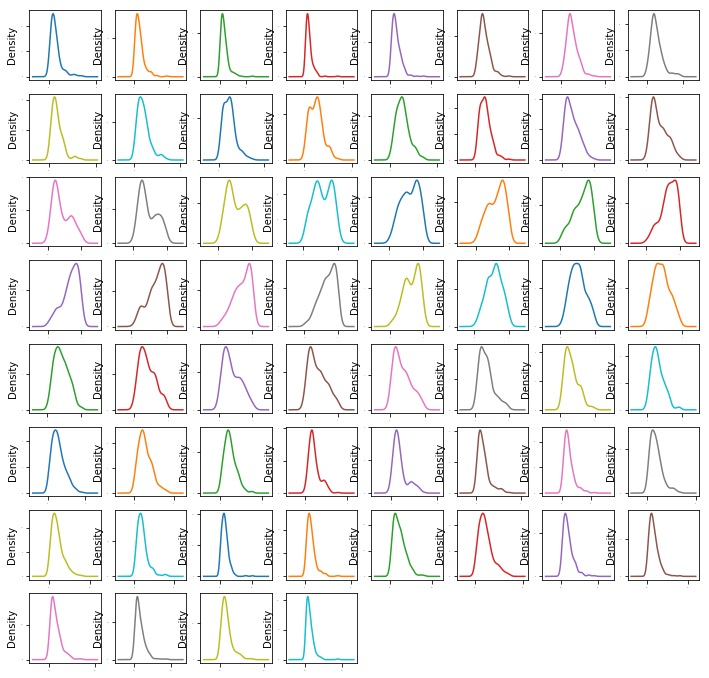

In [17]:
# density
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

# Standardizing the data

In [18]:
idx_numeric = [ 0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53,       54,       55,
             56,       57,       58,       59]

In [19]:
scaler = StandardScaler()

In [20]:
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [21]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,labels
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947,R
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852,R
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582,R
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640,R
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,...,-0.189390,-0.129077,1.230104,-0.847228,0.328253,-0.228741,0.550172,1.841992,1.831621,M
204,0.136733,-0.861801,-0.366036,0.054026,0.014392,-0.148740,-0.369029,-0.388465,-0.635067,0.053253,...,-0.761663,-0.200066,0.351373,-0.422934,-0.335815,-0.765856,-0.735798,-0.282388,0.038412,M
205,1.004381,0.160078,-0.673843,-0.531979,-0.723629,0.212502,0.064137,-0.200113,-0.442014,0.332912,...,0.268428,-1.108725,-0.801960,-0.437077,0.118548,1.070732,0.906526,-0.039138,-0.678871,M
206,0.049533,-0.095392,0.134804,0.148821,-1.055648,0.522865,0.401585,-0.264859,0.139685,0.202404,...,-0.501539,-0.867363,0.227802,-0.804798,-0.825128,-0.765856,-0.007598,-0.704020,-0.340154,M


Standardizing everything except labels because the purpose of standardization is to bring features with disparate ranges into a standard range. When the data is not standardized, features with large numerical values will tend to have a larger influence (weight) than those that are smaller numerically

# Encoding labels 'R' and 'M' as 0 and 1 respectively

In [22]:
data['labels'].unique()

array(['R', 'M'], dtype=object)

In [23]:
data['labels'] = data['labels'].map({'R': 0, 'M': 1})

In [24]:
data['labels'].unique()

array([0, 1], dtype=int64)

# Now applying PCA i.e. Principal Component Analysis

In [25]:
pca = PCA(n_components = 0.90)

In [26]:
 X = pca.fit_transform(data)

In [27]:
X

array([[ 1.88445827, -1.42272956, -1.70531011, ...,  0.858005  ,
        -1.22192358,  0.722425  ],
       [-0.39678237,  7.56010935, -1.39249087, ..., -0.05618533,
        -2.39169234,  0.02177105],
       [ 3.92870257,  6.35744627, -0.15361746, ..., -1.85442372,
        -1.7568583 , -2.00274551],
       ...,
       [-2.31185041, -2.69479851,  2.45036273, ..., -0.93271296,
        -0.87978395,  0.45607426],
       [-3.11981223, -1.77758158,  2.48871953, ..., -0.19753132,
        -0.5183813 ,  0.82059836],
       [-3.25092261, -2.20406427,  1.78357221, ..., -0.62264488,
        -0.72766032, -0.67779183]])

In [28]:
X.shape

(208, 22)

# Now applying SMOTE

In [29]:
sm = SMOTE(random_state = 42)

In [30]:
Y = np.array(data['labels'])

In [31]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
Y = Y.reshape(Y.shape[0],1)

In [33]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [34]:
X_res, Y_res = sm.fit_resample(X,Y)

In [35]:
X_res.shape

(222, 22)

In [36]:
X_res

array([[ 1.88445827e+00, -1.42272956e+00, -1.70531011e+00, ...,
         8.58004999e-01, -1.22192358e+00,  7.22424998e-01],
       [-3.96782372e-01,  7.56010935e+00, -1.39249087e+00, ...,
        -5.61853337e-02, -2.39169234e+00,  2.17710471e-02],
       [ 3.92870257e+00,  6.35744627e+00, -1.53617459e-01, ...,
        -1.85442372e+00, -1.75685830e+00, -2.00274551e+00],
       ...,
       [ 2.46956058e+00, -4.55181839e+00, -2.56681893e+00, ...,
        -1.42330705e-01, -4.69232731e-01,  5.67722239e-03],
       [ 4.32592192e+00, -5.30176976e+00, -4.57318896e+00, ...,
         2.64910187e-01, -1.36962852e-02,  5.34559153e-01],
       [-1.71085308e-01,  5.65244904e+00, -5.98542113e-01, ...,
         4.24190770e-02, -1.72586774e+00,  3.84542172e-01]])

In [37]:
Y_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

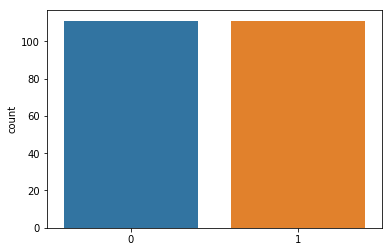

In [38]:
sns.countplot(Y_res)

# Support Vector Machine (SVM)

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.2)

In [40]:
from sklearn import svm

In [41]:
clf = svm.SVC(kernel='linear') # Linear Kernel

In [42]:
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
Y_pred = clf.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9333333333333333


In [45]:
print("Precision:",metrics.precision_score(Y_test, Y_pred))

Precision: 0.9130434782608695


In [46]:
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Recall: 0.9545454545454546
